In [72]:
# Importing the necessary module!

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Importing data

df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [74]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


<Axes: xlabel='Outlook', ylabel='Count'>

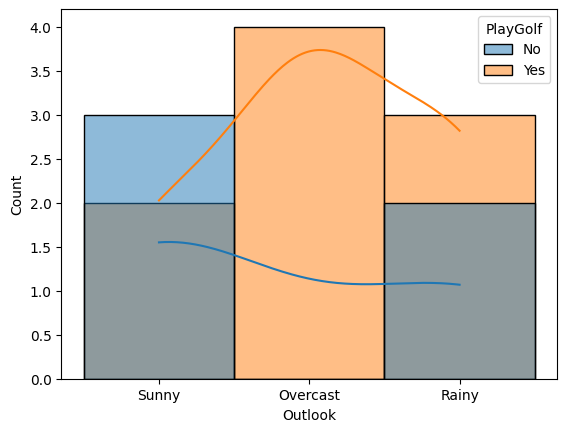

In [76]:
sns.histplot(x='Outlook', hue= 'PlayGolf', data = df, kde = True)

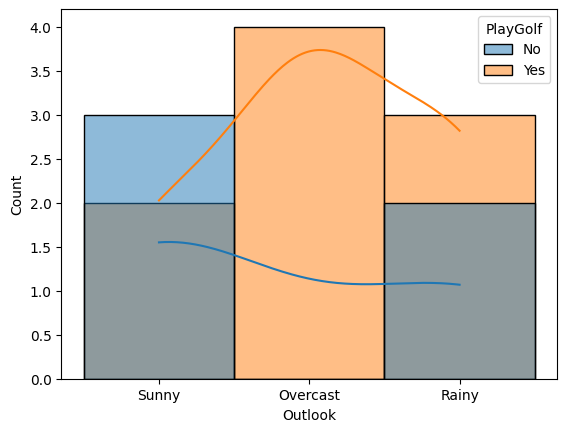

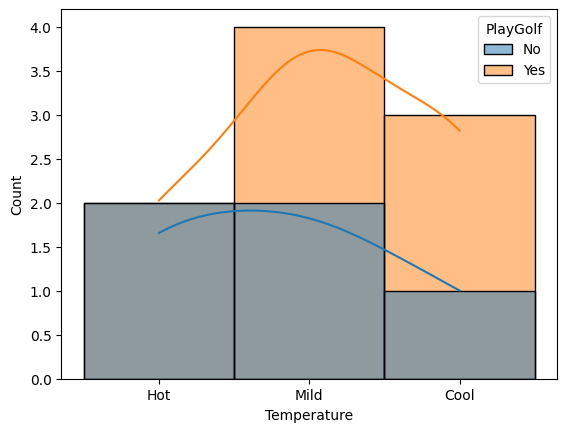

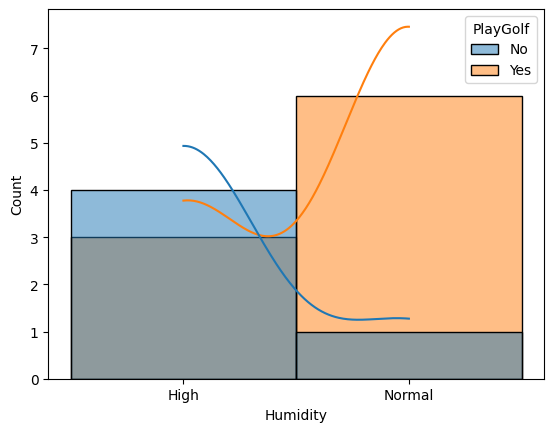

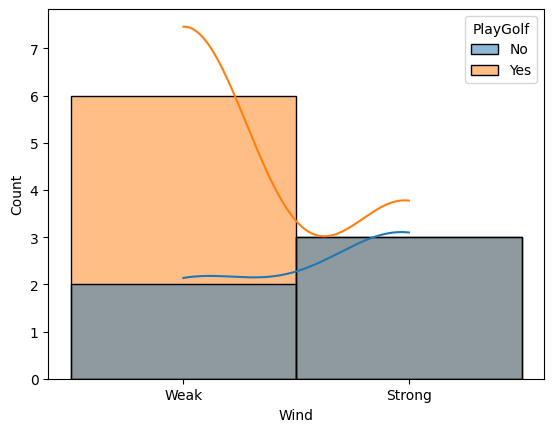

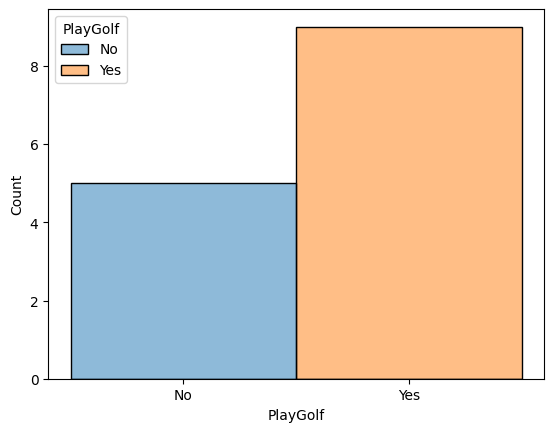

In [77]:
for i in df.columns:
    x= 0.88
    sns.histplot(x=i, hue= 'PlayGolf', data = df, kde = True)
    plt.show()


In [78]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


In [79]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df_getdummy.drop('PlayGolf',axis=1)
y = df_getdummy['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

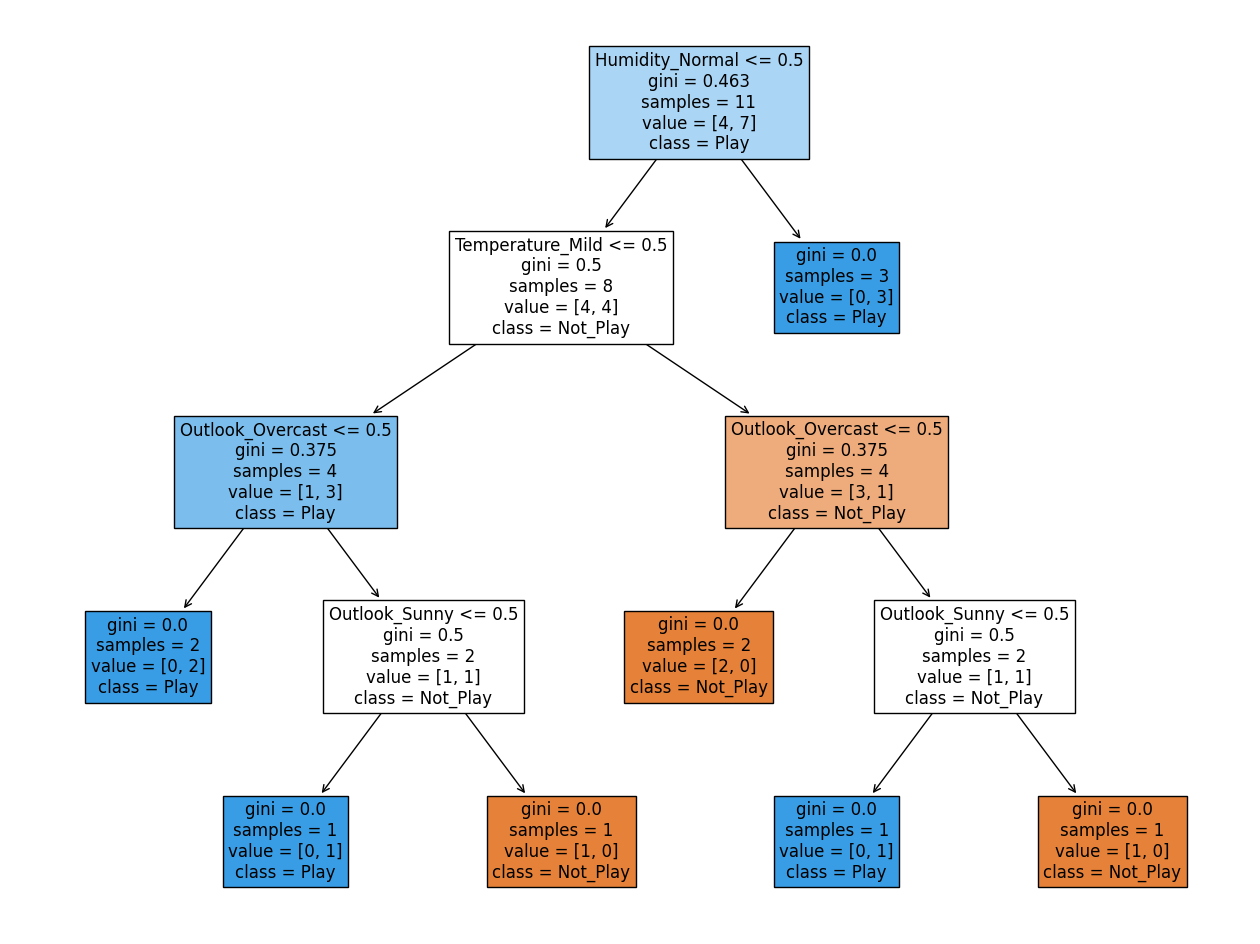

In [81]:
# visualising the decision tree diagram

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

In [82]:
# check accuracy of tree
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
print(f"The accuray of our model is {acc}")

The accuray of our model is 1.0


In [83]:
data = pd.read_csv('playgolf_data2.csv')
data

,Day,Outlook,Temperature,Humidity,Wind,PlayGolf
0,D1,Sunny,Mild,80,No,Yes
1,D2,Sunny,Hot,75,Yes,No
2,D3,Overcast,Hot,77,No,Yes
3,D4,Rainy,Cool,70,No,Yes
4,D5,Overcast,Cool,72,Yes,Yes
5,D6,Sunny,Mild,77,No,No
6,D7,Sunny,Cool,70,No,Yes
7,D8,Rainy,Mild,69,No,Yes
8,D9,Sunny,Mild,65,Yes,Yes
9,D10,Overcast,Mild,77,Yes,Yes


In [84]:
data = data.drop(columns=['Day'])

In [85]:
data

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Mild,80,No,Yes
1,Sunny,Hot,75,Yes,No
2,Overcast,Hot,77,No,Yes
3,Rainy,Cool,70,No,Yes
4,Overcast,Cool,72,Yes,Yes
5,Sunny,Mild,77,No,No
6,Sunny,Cool,70,No,Yes
7,Rainy,Mild,69,No,Yes
8,Sunny,Mild,65,Yes,Yes
9,Overcast,Mild,77,Yes,Yes


In [86]:
data_getdummy=pd.get_dummies(data=data, columns=['Temperature', 'Outlook', 'Wind'])
data_getdummy

,Humidity,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Outlook_Overcast,Outlook_Rain,Outlook_Rainy,Outlook_Sunny,Wind_No,Wind_Yes
0,80,Yes,False,False,True,False,False,False,True,True,False
1,75,No,False,True,False,False,False,False,True,False,True
2,77,Yes,False,True,False,True,False,False,False,True,False
3,70,Yes,True,False,False,False,False,True,False,True,False
4,72,Yes,True,False,False,True,False,False,False,False,True
5,77,No,False,False,True,False,False,False,True,True,False
6,70,Yes,True,False,False,False,False,False,True,True,False
7,69,Yes,False,False,True,False,False,True,False,True,False
8,65,Yes,False,False,True,False,False,False,True,False,True
9,77,Yes,False,False,True,True,False,False,False,False,True


In [141]:
X2 = data_getdummy.drop('PlayGolf',axis=1)
y2 = data_getdummy['PlayGolf']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=505)

In [142]:
dtree2 = DecisionTreeClassifier(max_depth=2)
dtree2.fit(X2_train,y2_train)
predictions2 = dtree2.predict(X2_test)

In [145]:
predictions3 = dtree2.predict(X2_train)

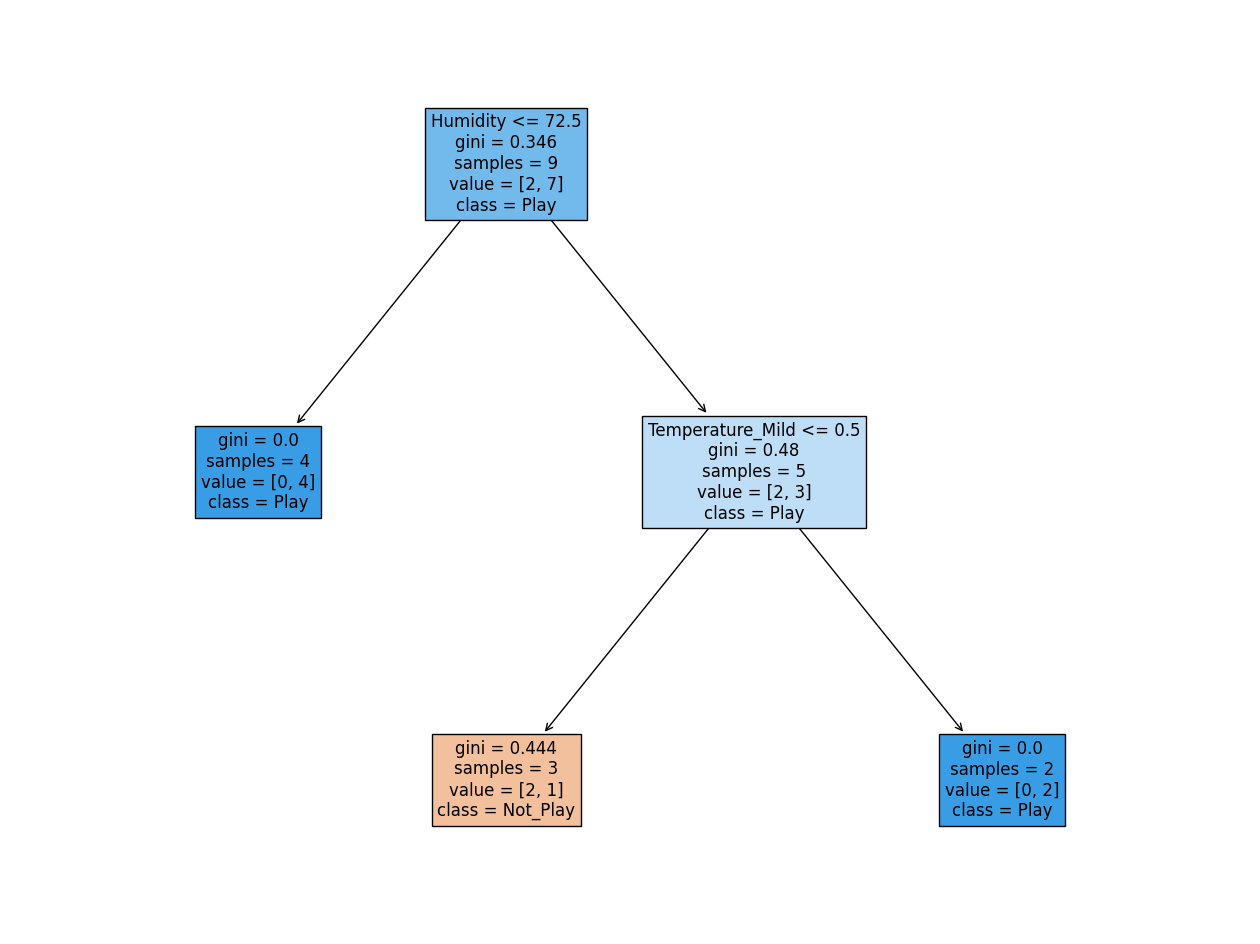

In [143]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree2, feature_names=data_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

In [146]:
acc2=accuracy_score(y2_test,predictions2)
acc3 = accuracy_score(y2_train, predictions3)
print(f"The accuray of our model is {acc2}")
print(f"The accuray of our model on training is {acc3}")


The accuray of our model is 0.8
The accuray of our model on training is 0.8888888888888888
